<a href="https://colab.research.google.com/github/Nemat-Allah-Aloush/Machine_Learning_Techinques/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nemat_Allah_Aloush_J41332c_MLT_2022_Task_4

* Name: Nemat Allah Aloush
* ISU group: J41332c
* ISU number: 336092

### Importing Packages

In [1]:
# data manipulation
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# data split
from sklearn.model_selection import train_test_split

### Reading and splitting Dataset

In [2]:
# Mounting to google drive
from google.colab import drive
drive.mount('/content/drive/')
# Reading the dataset
df = pd.read_csv("/content/drive/My Drive/Machine Learning Techniques 2022/bioresponse.csv")
df.head()

Mounted at /content/drive/


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
# Choosing the target feature
X = df.drop('Activity', axis=1).to_numpy()
# features are all the columns except the target one.
y = df[['Activity']].to_numpy()
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.25, random_state=42)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2813, 1777), (938, 1777), (2813, 1), (938, 1))

In [5]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1777, 2813), (1777, 938), (1, 2813), (1, 938))

### Neural Network

#### Sigmoid

In [7]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

#### Initialize Parameters

In [8]:
# initialize_with_zeros
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.    
    return w, b

#### Forward and Backward Propagation

In [9]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above
    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)
    grads = {"dw": dw,
             "db": db}
    return grads, cost

#### Optimization

#### Gradient Descent Algo

In [10]:
# optimize
def gd(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm  
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    costs = []
    for i in range(num_iterations):  
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

#### Stochastic Gradient Descent 

In [22]:
def SGD(w, b, X, Y, epoch, learning_rate, print_cost=False):
    costs = []
    for i in range(epoch):
        for j in range(X.shape[1]):
            # getting single sample
            point_x = X.iloc[:, j]
            point_x = point_x.to_numpy()
            point_x = point_x.reshape(point_x.shape[0], 1)
            point_y = Y[:, j]
            #point_y=point_y.to_numpy()
            # calculate gradient and cost function
            grads, cost = propagate(w, b, point_x, point_y)
            dw, db = grads["dw"], grads["db"]
            # update
            w -= learning_rate * dw
            b -= learning_rate * db
        _, cost = propagate(w, b, X, Y)
        # record the costs
        if i % 100 == 0:
            costs.append(cost)
        # print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print('Cost after iteration %i: %f' % (i, cost))
    params = {"w": w,
                "b": b}
    grads = {"dw": dw,
                "db": db}
    return params, grads, costs

#### Adam

In [12]:
def Adam(w, b, X, Y, epoch, learning_rate, print_cost=False, beta1=0.9, beta2=0.999, constant=1e-8):
    costs = []
    vdw, vdb = 0, 0     # moment
    sdw, sdb = 0, 0     # rmsprop
    iter = 1
    for e in range(epoch):        
        # calculate gradient and cost function
        grads, cost = propagate(w, b, X, Y)
        dw, db = grads["dw"], grads["db"]
        # moment, rmsprop
        vdw = (beta1 * vdw) + ((1 - beta1) * dw)
        vdb = (beta1 * vdb) + ((1 - beta1) * db)
        sdw = (beta2 * sdw) + ((1 - beta2) * (dw ** 2))
        sdb = (beta2 * sdb) + ((1 - beta2) * (db ** 2))
        # correcting
        vdw_corr = vdw / (1 - beta1 ** iter)
        vdb_corr = vdb / (1 - beta1 ** iter)
        sdw_corr = sdw / (1 - beta2 ** iter)
        sdb_corr = sdb / (1 - beta2 ** iter)
        # updating weight
        w -= learning_rate * vdw_corr / (np.sqrt(sdw_corr) + constant)
        b -= learning_rate * vdb_corr / (np.sqrt(sdb_corr) + constant)
        # record the cost
        if e % 100 == 0:
            costs.append(cost)
        # print the cost every 100 training iterations
        if print_cost and e % 100 == 0:
            print ("Cost after iteration %i: %f" %(e, cost))
        iter += 1
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

### Prediction

In [13]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

### Merge into a Model

In [14]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, optimizer='GD', print_cost=False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # optimizer
    assert optimizer != None
    if optimizer == 'GD':
        # Gradient descent
        parameters, grads, costs = gd(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    elif optimizer == 'SGD':
        parameters, grads, costs = SGD(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    elif optimizer == 'Adam':
        parameters, grads, costs = Adam(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)    
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### Training

In [15]:
# GD
d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=1e-3, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.675014
Cost after iteration 200: 0.662408
Cost after iteration 300: 0.650764
Cost after iteration 400: 0.639754
Cost after iteration 500: 0.629295
Cost after iteration 600: 0.619330
Cost after iteration 700: 0.609815
Cost after iteration 800: 0.600708
Cost after iteration 900: 0.591977
Cost after iteration 1000: 0.583593
Cost after iteration 1100: 0.575529
Cost after iteration 1200: 0.567764
Cost after iteration 1300: 0.560276
Cost after iteration 1400: 0.553047
Cost after iteration 1500: 0.546062
Cost after iteration 1600: 0.539304
Cost after iteration 1700: 0.532760
Cost after iteration 1800: 0.526418
Cost after iteration 1900: 0.520267
train accuracy: 88.30430145751866 %
test accuracy: 86.67377398720683 %


In [23]:
# SGD
d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=1e-3, optimizer='SGD', print_cost=True)

Cost after iteration 0: 0.470134
Cost after iteration 100: 0.014614
Cost after iteration 200: 0.007256
Cost after iteration 300: 0.004819
Cost after iteration 400: 0.003606
Cost after iteration 500: 0.002880
Cost after iteration 600: 0.002398
Cost after iteration 700: 0.002054
Cost after iteration 800: 0.001796
Cost after iteration 900: 0.001595
Cost after iteration 1000: 0.001435
Cost after iteration 1100: 0.001304
Cost after iteration 1200: 0.001195
Cost after iteration 1300: 0.001103
Cost after iteration 1400: 0.001024
Cost after iteration 1500: 0.000956
Cost after iteration 1600: 0.000896
Cost after iteration 1700: 0.000843
Cost after iteration 1800: 0.000796
Cost after iteration 1900: 0.000754
train accuracy: 100.0 %
test accuracy: 100.0 %


In [17]:
 # Adam
d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=1e-3, optimizer='Adam', print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.482086
Cost after iteration 200: 0.413108
Cost after iteration 300: 0.371327
Cost after iteration 400: 0.340881
Cost after iteration 500: 0.316638
Cost after iteration 600: 0.296339
Cost after iteration 700: 0.278799
Cost after iteration 800: 0.263315
Cost after iteration 900: 0.249436
Cost after iteration 1000: 0.236856
Cost after iteration 1100: 0.225354
Cost after iteration 1200: 0.214764
Cost after iteration 1300: 0.204958
Cost after iteration 1400: 0.195834
Cost after iteration 1500: 0.187310
Cost after iteration 1600: 0.179318
Cost after iteration 1700: 0.171804
Cost after iteration 1800: 0.164719
Cost after iteration 1900: 0.158025
train accuracy: 97.0494134376111 %
test accuracy: 83.68869936034115 %


### Comparison among the implemented optimization algorithms

Comparing using different learning rates: 1e-3, 1e-4, 1e-5, 1e-6, 1e-7

#### Learning Rate = 0.001

In [24]:
# learning rate
learning_rate = 1e-3
print('Gradient Descent')
gd_1 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, print_cost=False)
print('************')
print('Stochastic Gradient Descent')
sgd_1 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, optimizer='SGD', print_cost=False)
print('************')
print('Adam')
adam_1 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, optimizer='Adam', print_cost=False)

Gradient Descent
train accuracy: 88.30430145751866 %
test accuracy: 86.67377398720683 %
************
Stochastic Gradient Descent
train accuracy: 100.0 %
test accuracy: 100.0 %
************
Adam
train accuracy: 97.0494134376111 %
test accuracy: 83.68869936034115 %


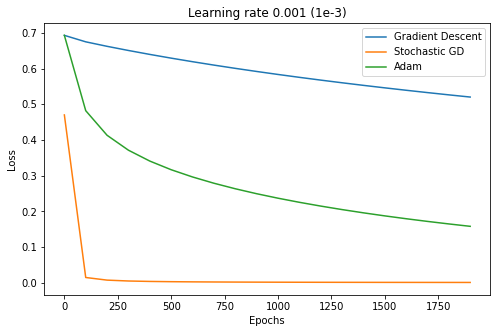

In [25]:
range_iter = np.arange(gd_1['num_iterations'], step=100)
plt.figure(figsize=(8,5))
plt.plot(range_iter, gd_1['costs'], label='Gradient Descent')
plt.plot(range_iter, sgd_1['costs'], label='Stochastic GD')
plt.plot(range_iter, adam_1['costs'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning rate 0.001 (1e-3)')
plt.legend()
plt.show()

#### Learning Rate = 0.0001

In [26]:
# learning rate
learning_rate = 1e-4
print('Gradient Descent')
gd_2 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, print_cost=False)
print('************')
print('Stochastic Gradient Descent')
sgd_2 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, optimizer='SGD', print_cost=False)
print('************')
print('Adam')
adam_2 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, optimizer='Adam', print_cost=False)

Gradient Descent
train accuracy: 59.971560611446854 %
test accuracy: 63.859275053304906 %
************
Stochastic Gradient Descent
train accuracy: 100.0 %
test accuracy: 100.0 %
************
Adam
train accuracy: 83.96729470316389 %
test accuracy: 78.14498933901919 %


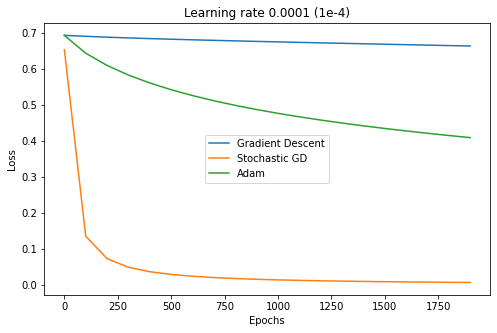

In [28]:
range_iter = np.arange(gd_2['num_iterations'], step=100)
plt.figure(figsize=(8,5))
plt.plot(range_iter, gd_2['costs'], label='Gradient Descent')
plt.plot(range_iter, sgd_2['costs'], label='Stochastic GD')
plt.plot(range_iter, adam_2['costs'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning rate 0.0001 (1e-4)')
plt.legend()
plt.show()

#### Learning Rate = 0.00001

In [29]:
# learning rate
learning_rate = 1e-5
print('Gradient Descent')
gd_3 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, print_cost=False)
print('************')
print('Stochastic Gradient Descent')
sgd_3 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, optimizer='SGD', print_cost=False)
print('************')
print('Adam')
adam_3 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, optimizer='Adam', print_cost=False)

Gradient Descent
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
************
Stochastic Gradient Descent
train accuracy: 100.0 %
test accuracy: 100.0 %
************
Adam
train accuracy: 71.91610380376821 %
test accuracy: 71.32196162046908 %


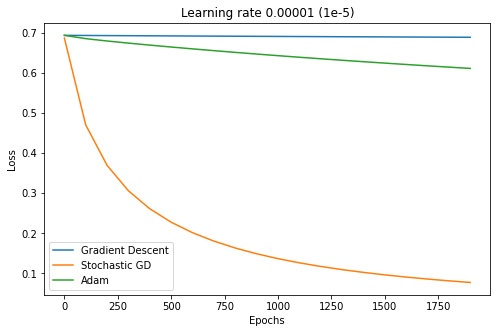

In [30]:
plt.figure(figsize=(8,5))
plt.plot(range_iter, gd_3['costs'], label='Gradient Descent')
plt.plot(range_iter, sgd_3['costs'], label='Stochastic GD')
plt.plot(range_iter, adam_3['costs'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning rate 0.00001 (1e-5)')
plt.legend()
plt.show()

#### Learning Rate = 0.000001

In [31]:
# learning rate
learning_rate = 1e-6
print('Gradient Descent')
gd_4 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, print_cost=False)
print('************')
print('Stochastic Gradient Descent')
sgd_4 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, optimizer='SGD', print_cost=False)
print('************')
print('Adam')
adam_4 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, optimizer='Adam', print_cost=False)

Gradient Descent
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
************
Stochastic Gradient Descent
train accuracy: 94.13437611091362 %
test accuracy: 92.75053304904051 %
************
Adam
train accuracy: 56.48773551368645 %
test accuracy: 60.3411513859275 %


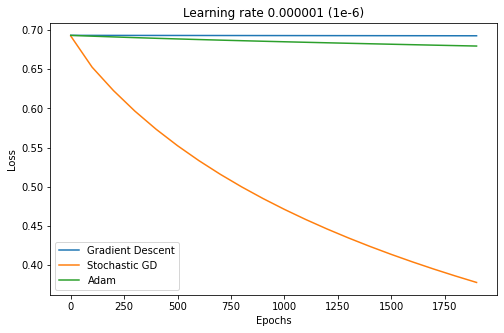

In [32]:
plt.figure(figsize=(8,5))
plt.plot(range_iter, gd_4['costs'], label='Gradient Descent')
plt.plot(range_iter, sgd_4['costs'], label='Stochastic GD')
plt.plot(range_iter, adam_4['costs'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning rate 0.000001 (1e-6)')
plt.legend()
plt.show()

#### Learning Rate = 0.0000001

In [33]:
# learning rate
learning_rate = 1e-7
print('Gradient Descent')
gd_5 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, print_cost=False)
print('************')
print('Stochastic Gradient Descent')
sgd_5 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, optimizer='SGD', print_cost=False)
print('************')
print('Adam')
adam_5 = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=learning_rate, optimizer='Adam', print_cost=False)

Gradient Descent
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
************
Stochastic Gradient Descent
train accuracy: 75.29328119445432 %
test accuracy: 77.9317697228145 %
************
Adam
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %


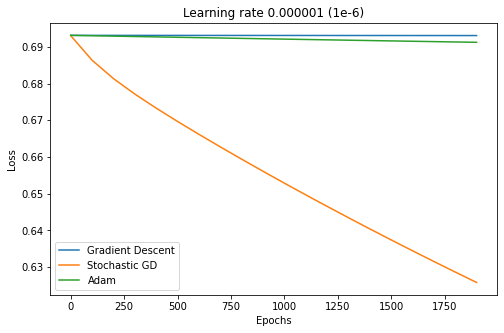

In [34]:
plt.figure(figsize=(8,5))
plt.plot(range_iter, gd_5['costs'], label='Gradient Descent')
plt.plot(range_iter, sgd_5['costs'], label='Stochastic GD')
plt.plot(range_iter, adam_5['costs'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning rate 0.000001 (1e-6)')
plt.legend()
plt.show()